In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [93]:
fiscal_df = pd.read_csv('data/Sdf16_1a.txt', sep = '\t')
rla_df = pd.read_csv('data/rla-achievement-lea-sy2015-16.csv', sep = ',')
math_df = pd.read_csv('data/math-achievement-lea-sy2015-16.csv', sep = ',')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,45,129,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Problem 1

In [17]:
fiscal_df

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,5680250,51502040100000,56,56039,N,27220,Region V BOCES,Wyoming,WY,07,...,N,N,N,N,N,N,N,N,N,N
18704,5680251,N,56,56021,N,16940,Wyoming Department of Family Services,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18705,5680252,N,56,56005,N,23940,Youth Emergency Services Inc. - Administration...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18706,5680253,N,56,56025,N,16220,Wyoming Behavioral Institute - Administration ...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N


#### It seems like the federal funding revenue follows a pwer log distribution.

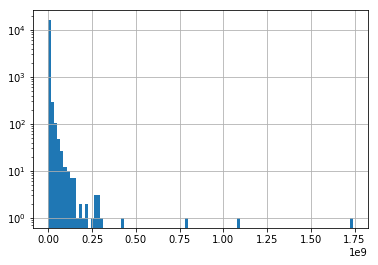

In [28]:
fiscal_df[fiscal_df['TFEDREV'] > 0]['TFEDREV'].hist(bins = 100, log = True)

In [40]:
fiscal_df[['TFEDREV','STNAME']].groupby('STNAME').sum().rename(columns = {'TFEDREV': 'Revenue'})\
                .sort_values('Revenue', ascending = False)

,Revenue
STNAME,
California,7709274795
Texas,6194316950
New York,3374793578
Florida,3147328988
Illinois,2334944853
Pennsylvania,2037314939
Ohio,1837962930
Georgia,1815241986
Michigan,1731033937


Text(0, 0.5, 'Revenue per State')

<Figure size 432x288 with 0 Axes>

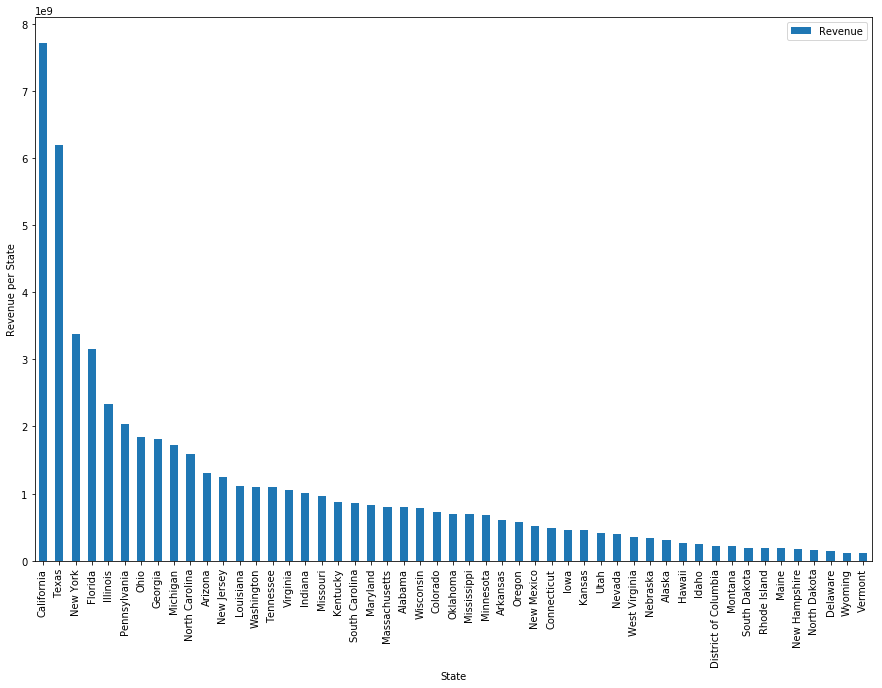

In [194]:
plt.figure()
fiscal_df[['TFEDREV','STNAME']].groupby('STNAME').sum().rename(columns = {'TFEDREV': 'Revenue'}).rename_axis('State')\
                .sort_values('Revenue', ascending = False).plot.bar(figsize = (15,10))
plt.ylabel('Revenue per State')

Text(0, 0.5, 'Federal Funding Per Student')

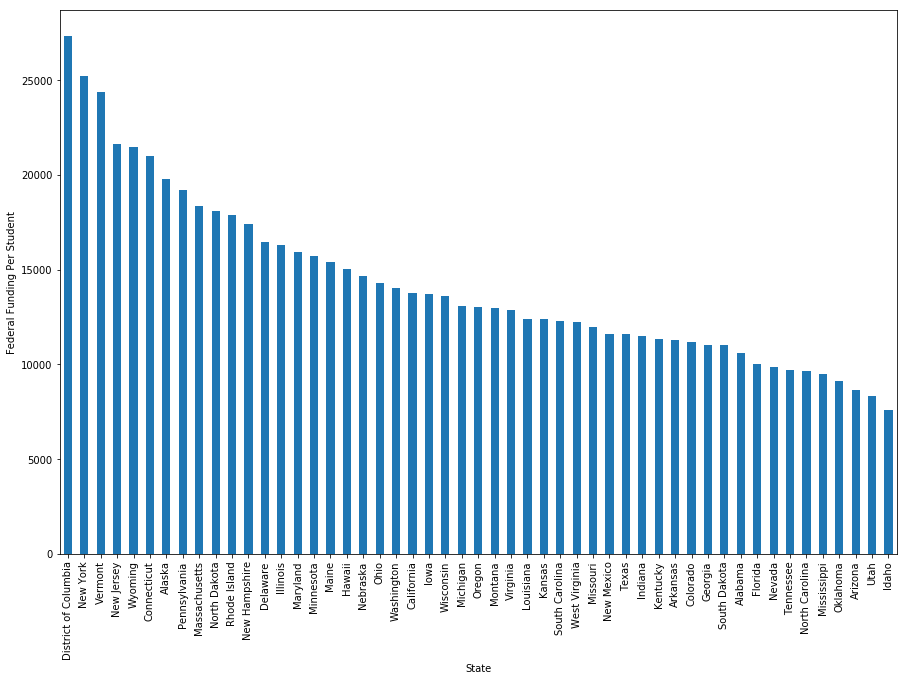

In [66]:
fiscal_df_per_captita = fiscal_df[["STNAME", "TOTALEXP", "V33"]].groupby(['STNAME']).sum()

plt.figure()
(fiscal_df_per_captita['TOTALEXP']/fiscal_df_per_captita['V33']).rename_axis('State')\
    .sort_values(ascending = False).plot.bar(figsize = (15,10))
plt.ylabel('Federal Funding Per Student')

### Problem 2

In [75]:
fiscal_df

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,5680250,51502040100000,56,56039,N,27220,Region V BOCES,Wyoming,WY,07,...,N,N,N,N,N,N,N,N,N,N
18704,5680251,N,56,56021,N,16940,Wyoming Department of Family Services,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18705,5680252,N,56,56005,N,23940,Youth Emergency Services Inc. - Administration...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18706,5680253,N,56,56025,N,16220,Wyoming Behavioral Institute - Administration ...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N


In [78]:
exp_rev_df = fiscal_df[['TOTALEXP','STNAME', 'TOTALREV']].rename(columns = {'TOTALEXP': 'Total Expenditure', 'TOTALREV': 'Total Revenue'}).rename_axis('State')

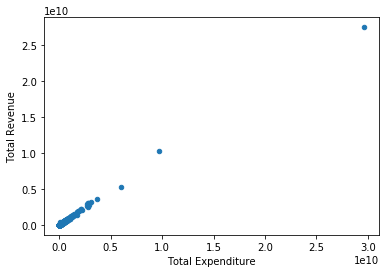

In [80]:
exp_rev_df.plot.scatter('Total Expenditure', 'Total Revenue')

### There is a clean linear relationships between revenue and expenditures, as expected.

Text(0, 0.5, 'Debt per student')

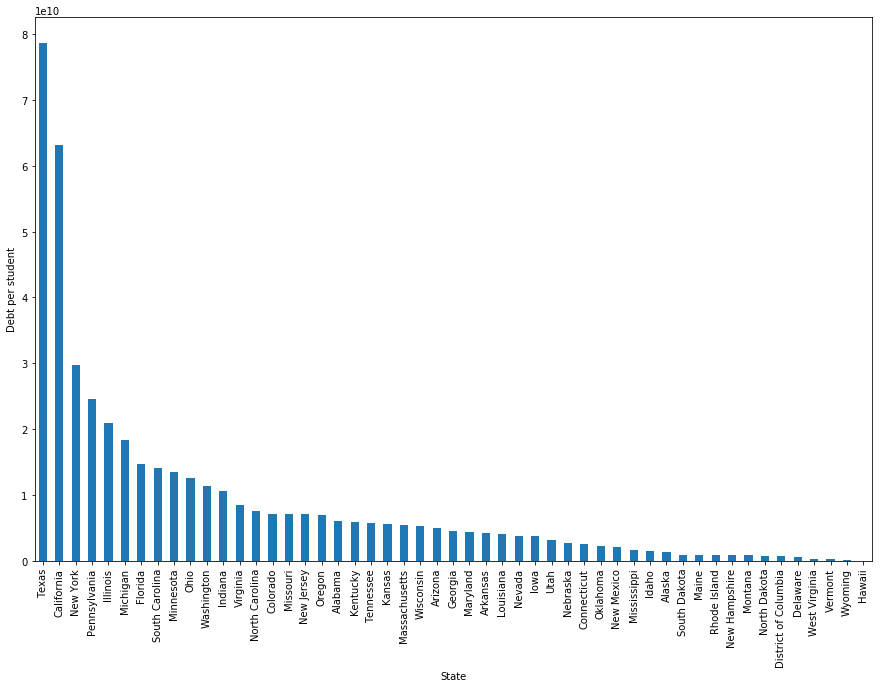

In [82]:
fiscal_df_per_captita = fiscal_df[["STNAME", "_41F", "_66V"]].groupby(['STNAME']).sum()

plt.figure()
(fiscal_df_per_captita['_41F']+fiscal_df_per_captita['_66V']).rename_axis('State')\
    .sort_values(ascending = False).plot.bar(figsize = (15,10))
plt.ylabel('Debt per student')

In [96]:
fiscal_math_df = pd.merge(fiscal_df, math_df)

In [100]:
math_df['ALL_MTH00PCTPROF_1516'].unique()

array(['42', '39', '66', '72', '37', '43', '69', '21', '62', '47', '34',
       '60', '23', '54', '48', '46', '50', '11', '19', '35', '51', '13',
       '26', '32', '22', '27', '41', '49', '44', '31', '38', '67', '53',
       '33', '20', '36', '14', '63', '40', '56', '45', '52', '10', '17',
       '29', '28', '87', '59', '58', '78', '10-14', '30', '25-29',
       '30-34', '60-64', '30-39', '61', '45-49', '68', '35-39', '11-19',
       'LT50', 'PS', '65-69', '80-89', '85-89', '55-59', 'LE10', '55',
       '2', '15-19', '40-44', '50-54', 'LE20', '16', 'LE5', '20-29',
       '21-39', '70-74', '15', 'GE90', '86', '76', '40-49', '24', '75-79',
       '74', '25', '50-59', '70-79', '6-9', '85', '7', '40-59', '60-79',
       '80-84', '20-24', '71', '65', '8', '64', '82', 'GE50', '80', '70',
       '77', '88', '83', '93', '81', '57', '75', '84', '92', '73', 'GE95',
       '18', '12', '6', '9', '3', '90', 'LE1', '4', 'GE80', '5', '60-69',
       '79', '89', '98', '91', '95', '90-94', '94', 'GE99

In [116]:
def unblur(x):
    
    if '-' in x:
        return (int(x.split('-')[0]) + int(x.split('-')[1])) / 2
    
    if 'GE' in x:
         return ((int(x.replace('GE', '')) + 100)/2)
    
    if 'LE' in x:
         return ((int(x.replace('LE', '')) + 0)/2)
        
fiscal_math_df['ALL_MTH00PCTPROF_1516'].apply(unblur).unique()

array([ nan, 12. , 27. , 32. , 62. , 34.5, 47. , 37. , 15. , 67. , 84.5,
       87. , 57. ,  5. , 17. , 42. , 52. , 10. ,  2.5, 24.5, 30. , 72. ,
       95. , 44.5, 77. , 54.5, 74.5,  7.5, 49.5, 69.5, 82. , 22. , 75. ,
       97.5, 64.5, 92. , 90. ,  0.5])

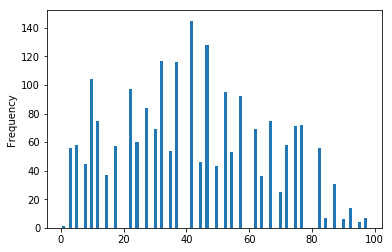

In [131]:
fiscal_math_df['Unblurred_Scores'] = fiscal_math_df['ALL_MTH00PCTPROF_1516'].apply(unblur)
fiscal_math_df['Unblurred_Scores'].plot.hist(bins = 100)

#### The distribution looks like a normal distribution that flattens out at 0. This makes sense since a lower score than 0 is not possible.
#### As such, we use a normal distribution to estimate the distribution of the original scores. We use KL Divergence to figure out goodness of fit

In [133]:
fiscal_math_df['Unblurred_Scores'] = fiscal_math_df['ALL_MTH00PCTPROF_1516'].apply(unblur)
unblurred_mean = fiscal_math_df['Unblurred_Scores'].mean()
unblurred_sigma = fiscal_math_df['Unblurred_Scores'].std()

fiscal_math_df['Unblurred_Scores'] = fiscal_math_df['Unblurred_Scores']\
    .fillna(pd.Series([abs(np.random.normal(unblurred_mean,unblurred_sigma)) for i in range(len(fiscal_math_df))]))


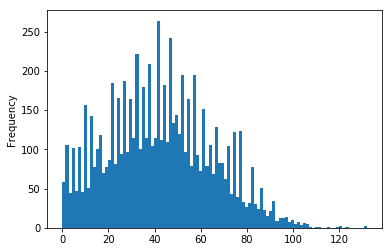

In [134]:
fiscal_math_df['Unblurred_Scores'].plot.hist(bins = 100)

In [135]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [152]:
kl_divergence(fiscal_math_df['Unblurred_Scores'].sample(4955),
              list(fiscal_math_df[fiscal_math_df['ALL_MTH00PCTPROF_1516'].str.isnumeric()]\
                   ['ALL_MTH00PCTPROF_1516'].astype(int)))

45565.525218373106

In [158]:
kl_divergence(np.random.uniform(0,100,4955),
              list(fiscal_math_df[fiscal_math_df['ALL_MTH00PCTPROF_1516'].str.isnumeric()]\
                   ['ALL_MTH00PCTPROF_1516'].astype(int)))

97121.56023652945

### KL divergence as we can see is about twice as good as a random distribution

## Problem 4

#### The amount of money to be cut is

In [161]:
fiscal_df['TFEDREV'].sum() * .15

8340410870.7

In [182]:
to_cut = fiscal_df['TFEDREV'].sum() * .15
tocut_df = fiscal_df[['LEAID','TOTALEXP','V33']]
tocut_df = tocut_df[(tocut_df['TOTALEXP'] > 0) & (tocut_df['V33'] > 0)]
tocut_df['percapita_spending'] = tocut_df['TOTALEXP']/tocut_df['V33']

In [188]:
for i, v in tocut_df.sort_values('percapita_spending', ascending = False).iterrows():
    
    if to_cut - v['TOTALEXP'] * .20 > 0:
        
        tocut_df.loc[i, 'to_cut'] = v['TOTALEXP'] * .20
        to_cut -= (v['TOTALEXP'] * .20)
    else:
        tocut_df.loc[i, 'to_cut'] = 0

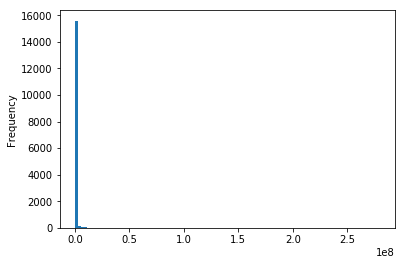

In [191]:
tocut_df['to_cut'].plot.hist(bins = 100)

In [193]:
tocut_df['to_cut'].value_counts()

0.0          15224
1205000.0        2
711400.0         2
424800.0         2
636400.0         2
             ...  
1364800.0        1
862600.0         1
1233600.0        1
3712200.0        1
145400.0         1
Name: to_cut, Length: 657, dtype: int64